#q1
@task(retries=3, retry_delay_seconds=2, name="Read taxi data")
#q2
- the first one 0 9 3 * *

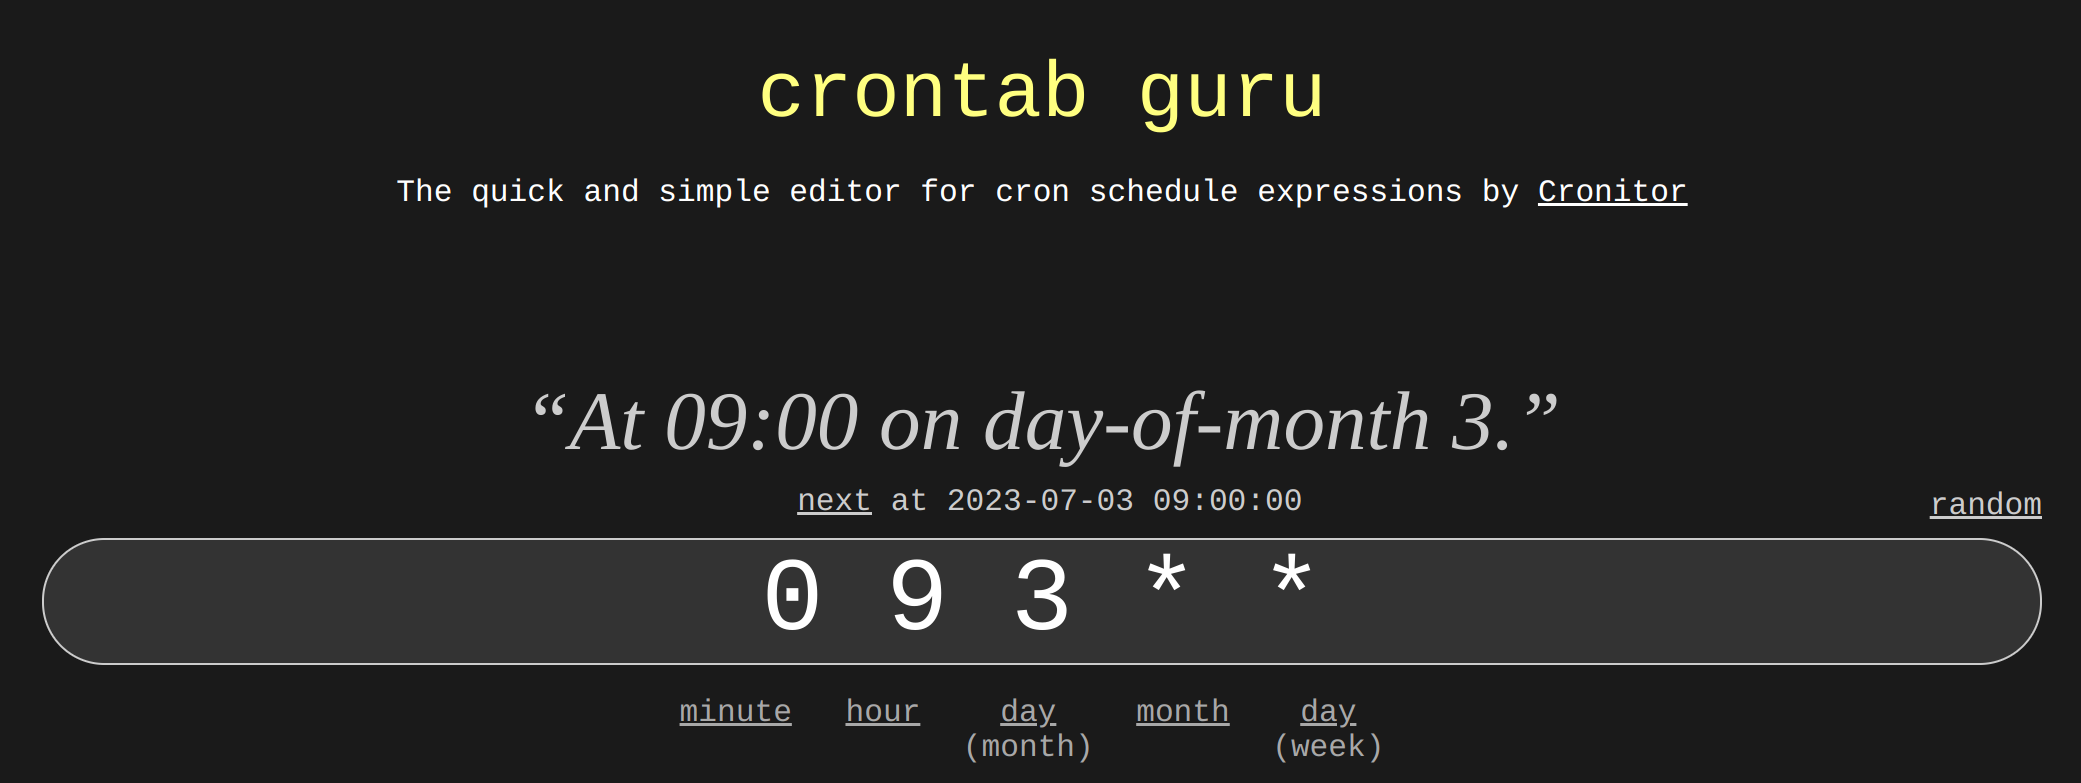

In [2]:
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet" -O ./code/data/green_tripdata_2023-01.parquet
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet" -O ./code/data/green_tripdata_2023-02.parquet
#!wget "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet" -O ./code/data/green_tripdata_2023-03.parquet
import sys
sys.path.append('./code')

--2023-06-10 09:40:58--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.226.4.64, 13.226.4.174, 13.226.4.101, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.226.4.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘./code/data/green_tripdata_2023-01.parquet’

./code/data/green_t 100%[===================>]   1.36M  1.21MB/s    in 1.1s    

2023-06-10 09:41:00 (1.21 MB/s) - ‘./code/data/green_tripdata_2023-01.parquet’ saved [1427002/1427002]

--2023-06-10 09:41:01--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.226.4.208, 13.226.4.101, 13.226.4.174, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.226.4.208|:443... connected.
HT

In [1]:
import pandas as pd
# Provide the URL of the Parquet file
training_url = "./code/data/green_tripdata_2023-01.parquet"

# Read the Parquet file into a pandas DataFrame
train_df = pd.read_parquet(training_url)

# Explore the DataFrame or perform further data processing
print(train_df.head())

# Provide the URL of the Parquet file
validation_url = "./code/data/green_tripdata_2023-02.parquet"

# Read the Parquet file into a pandas DataFrame
val_df = pd.read_parquet(validation_url)

# Explore the DataFrame or perform further data processing
print(val_df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0   

In [2]:
#!prefect config view --show-defaults
!prefect config view

# clear config setting to avoid a bug in set
#!prefect config unset PREFECT_API_URL

# use a local Prefect server
#!prefect config set PREFECT_API_URL="http://prefect_mlops:4200/api"

# use Prefect Cloud
# !prefect config set PREFECT_API_URL="https://api.prefect.cloud/api/accounts/[ACCOUNT-ID]/workspaces/[WORKSPACE-ID]"


PREFECT_PROFILE='default'



In [4]:
#!pip install -r requirements.txt
!python3 ./code/orchestrate.py

     |████████████████████████████████| 1.7 MB 10.5 MB/s            
     |████████████████████████████████| 1.6 MB 115.0 MB/s            
     |████████████████████████████████| 17.7 MB 112.5 MB/s            
     |████████████████████████████████| 12.3 MB 79.4 MB/s            
     |████████████████████████████████| 2.4 MB 67.8 MB/s            
     |████████████████████████████████| 53 kB 5.9 MB/s             
     |████████████████████████████████| 200.3 MB 21 kB/s             
     |████████████████████████████████| 143 kB 118.5 MB/s            
     |████████████████████████████████| 840 kB 99.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 91 kB 25.7 MB/s             
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492022 sha256=5ac483ebac7c22c2089fb847d8980d8fc85d949ed2834d77b86baf0f426c859c
  Stored in directory: /home/jovyan/.cache/pip/wheels/5e/a9/47/f118e66afd12240e4662752cc22cefae5d97275623aa8ef57

In [8]:
#!prefect project init

Created project in /home/work with the following new files:
.prefectignore
deployment.yaml
prefect.yaml
.prefect/


In [4]:
!prefect deploy ./code/orchestrate.py:main_flow_local -n taxi_local -p mlops-prefect-pool

Conflicting entry found for flow with name 'main-flow':
main-flow: orchestrate.py:main_flow


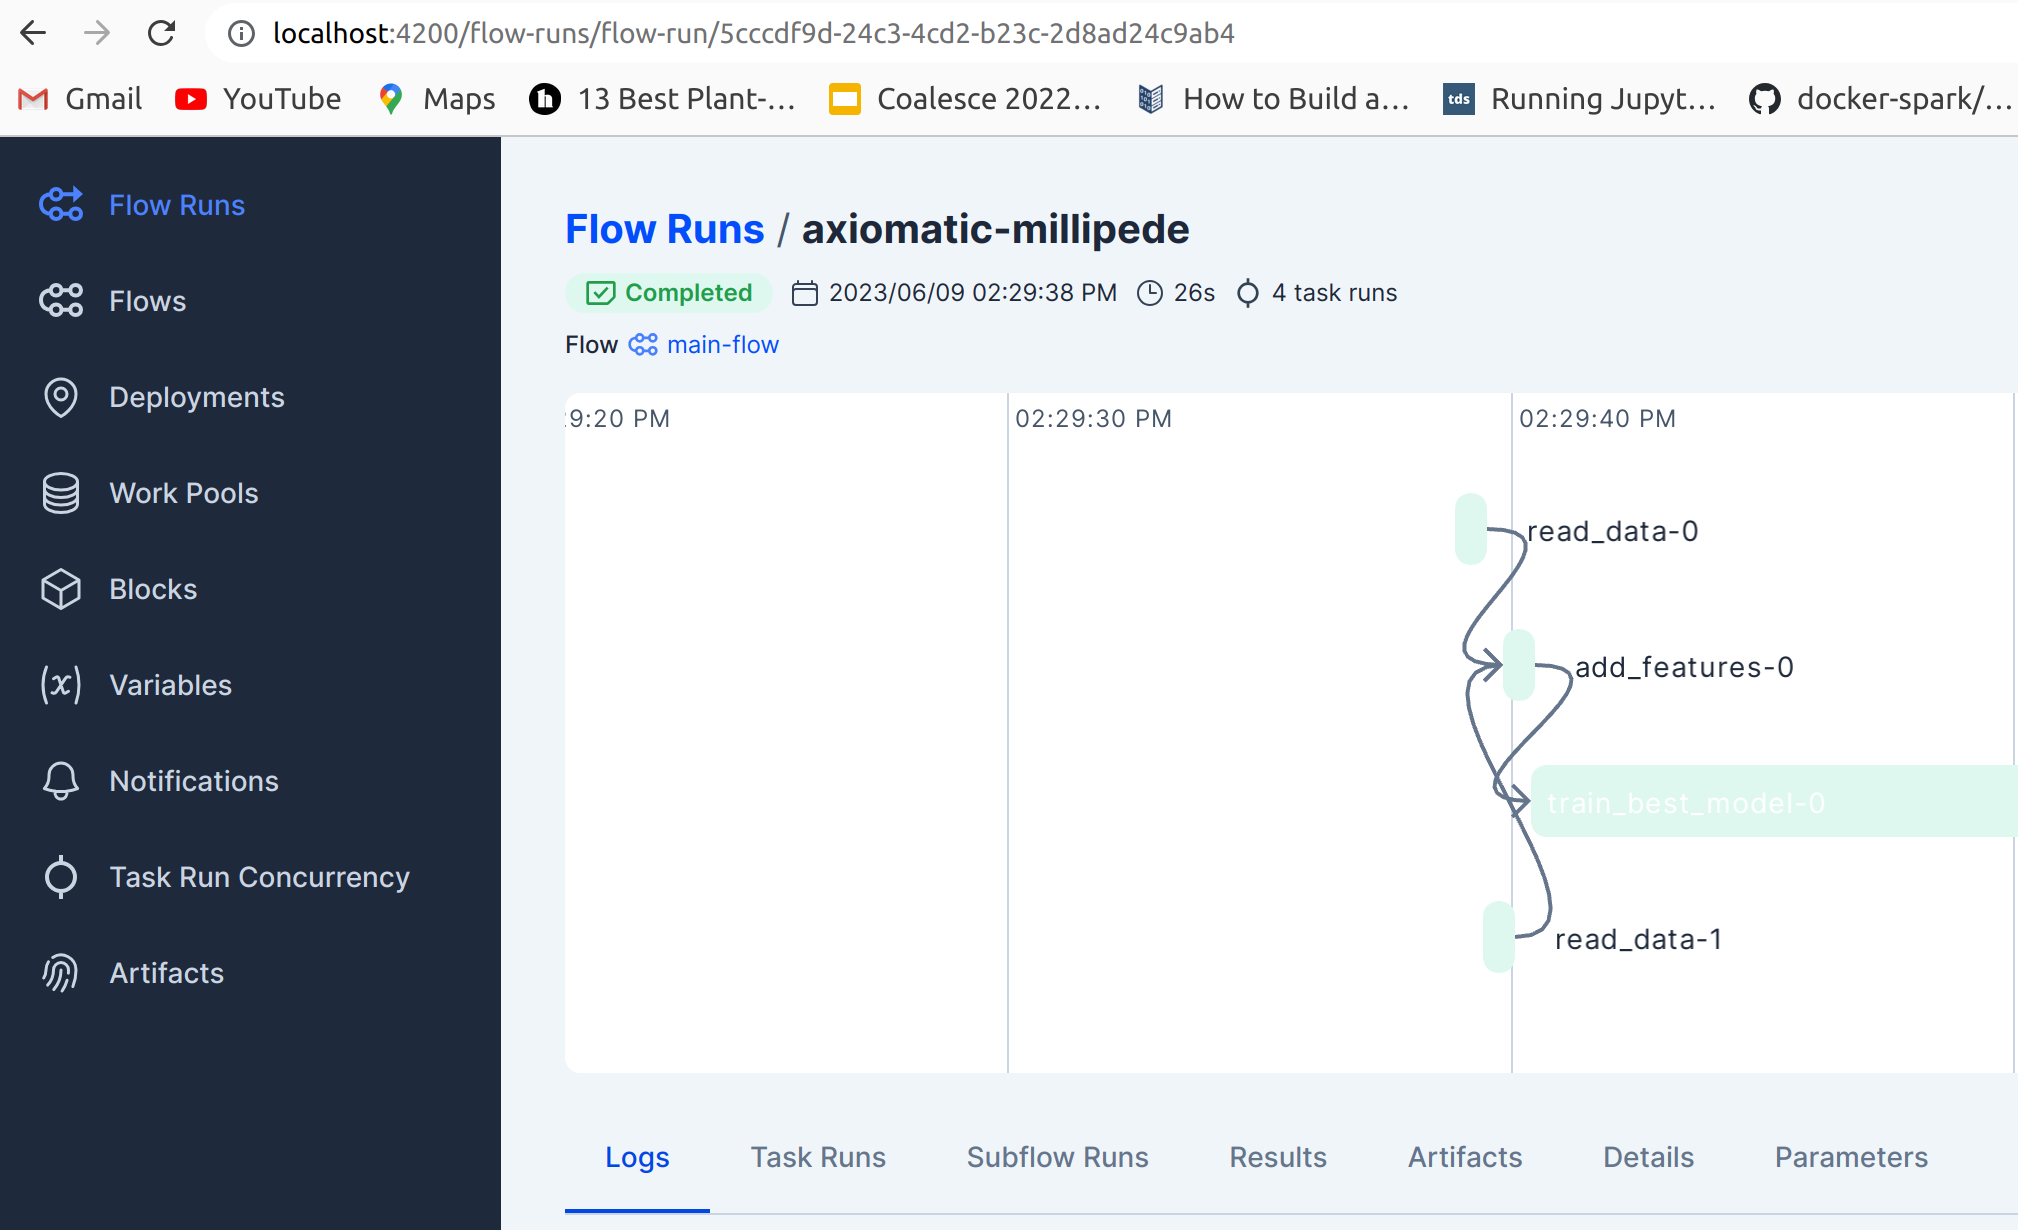

#q3: rmse 5.19931

In [1]:
!python3 ./code/s3_block.py

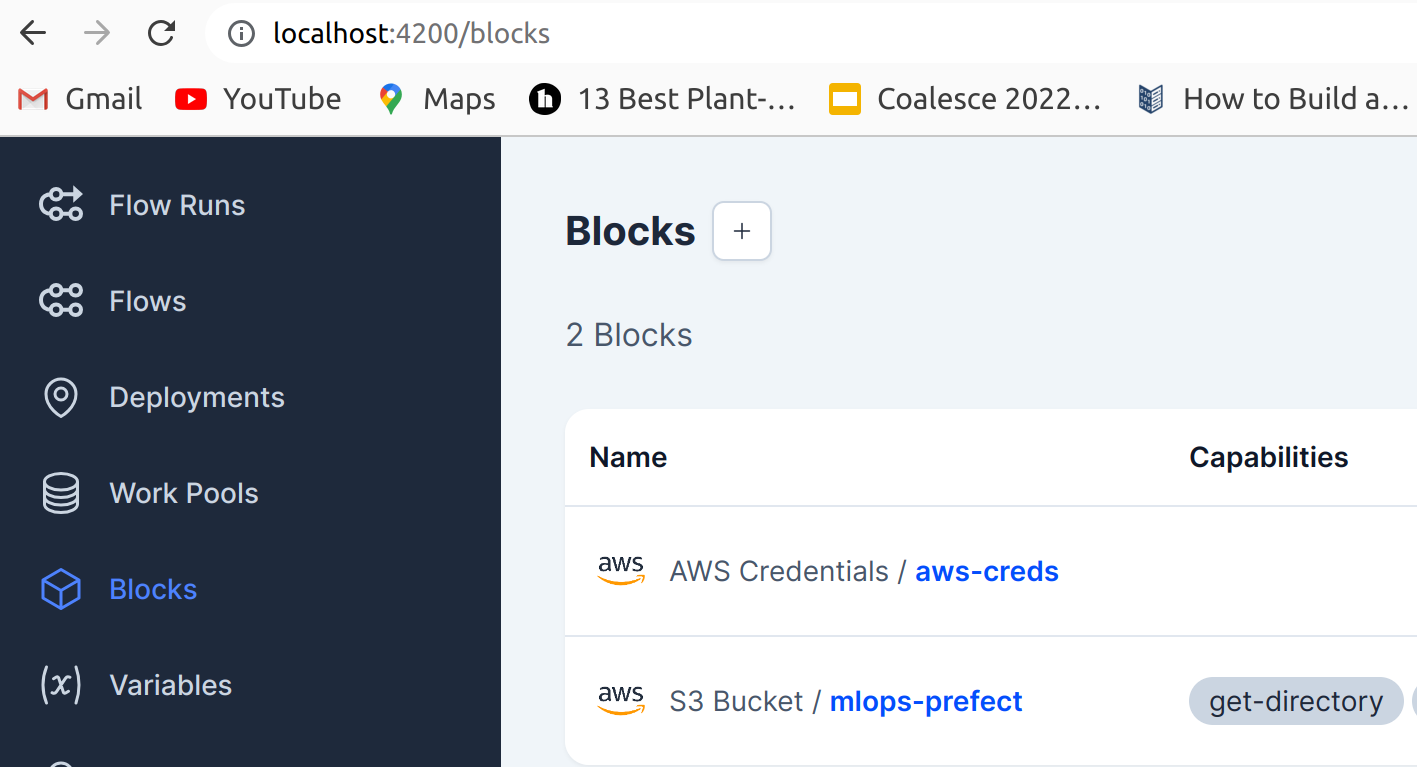

In [8]:
# upload .parquet files to s3 bucket before deleting them
#from utils import upload_to_s3
#import os 

#files = os.listdir("data")
#for file in files:
#    if file.endswith(".parquet"):
#        upload_to_s3(f"data/{file}", "mlops-prefect")     

In [3]:
# running with data from s3_bucket
!prefect deploy ./code/orchestrate_s3.py:main_flow_s3 -n taxi_s3 -p mlops-prefect-pool

Deployment 'main-flow-s3/s3_taxi' successfully created with id 
'006aa6ab-8f2a-4654-b8e1-f2288a397c13'.
View Deployment in UI: 
http://prefect_mlops:4200/deployments/deployment/006aa6ab-8f2a-4654-b8e1-f2288a3
97c13

To execute flow runs from this deployment, start a worker that pulls work from 
the 'mlops-prefect-pool' work pool


In [ ]:
!prefect worker start -p mlops-prefect-pool

Discovered worker type 'process' for work pool 'mlops-prefect-pool'.
Worker 'ProcessWorker c8c2b20e-43cd-47f4-b3c5-871f9f22a283' started!
14:00:05.302 | INFO    | prefect.worker.process.processworker c8c2b20e-43cd-47f4-b3c5-871f9f22a283 - Submitting flow run 'e83c40ae-1678-45d9-88be-4f78fe09b700'
14:00:05.414 | INFO    | prefect.worker.process.processworker c8c2b20e-43cd-47f4-b3c5-871f9f22a283 - Opening process...
14:00:05.433 | INFO    | prefect.worker.process.processworker c8c2b20e-43cd-47f4-b3c5-871f9f22a283 - Completed submission of flow run 'e83c40ae-1678-45d9-88be-4f78fe09b700'
/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'prefect.engine' found in sys.modules after import of package 'prefect', but prior to execution of 'prefect.engine'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Cloning into 'mlops-prefect-flows'...
14:00:08.359 | INFO    | prefect.projects - Cloned repository 'https://github.com/arybach/mlops-prefect-flows.git' into 'mlops-

In [ ]:
!prefect worker start -p mlops-prefect-pool
!prefect deployment run main_flow_s3/taxi_s3

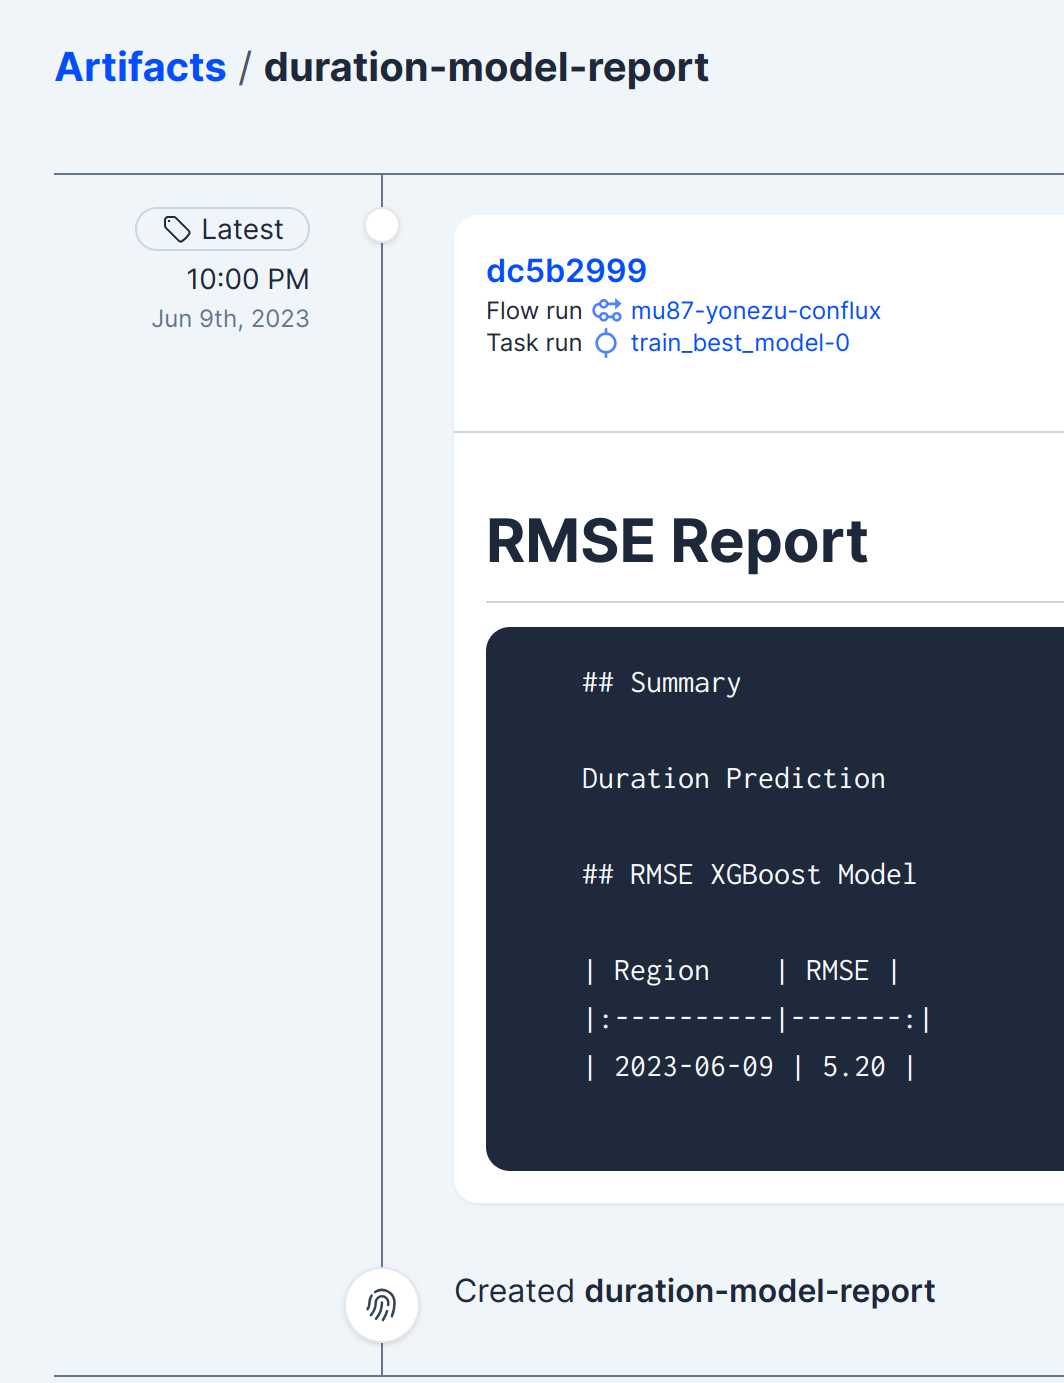

In [2]:
!prefect project recipe ls

                           Available project recipes                            
┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Name       ┃ Description                                                     ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ docker     │ Store project within a custom docker image alongside its        │
│            │ runtime environment                                             │
│ docker-gcs │ Store project within GCS and build a custom docker image for    │
│            │ runtime                                                         │
│ docker-git │ Store project within a git repository and build a custom docker │
│            │ image for runtime                                               │
│ docker-s3  │ Store project within S3 and build a custom docker image for     │
│            │ runtime                                                         │
│ gcs        │ Store project

In [2]:
# running with data urls as deployment.yaml params
!prefect deploy ./code/orchestrate_params.py:main_flow_params -n taxi_params -p mlops-prefect-pool

Deployment 'main-flow-params/taxi_params' successfully created with id 
'0a2ea768-ac56-4b5f-88de-f3bfc38ef2d9'.
View Deployment in UI: 
http://prefect_mlops:4200/deployments/deployment/0a2ea768-ac56-4b5f-88de-f3bfc38
ef2d9

To execute flow runs from this deployment, start a worker that pulls work from 
the 'mlops-prefect-pool' work pool


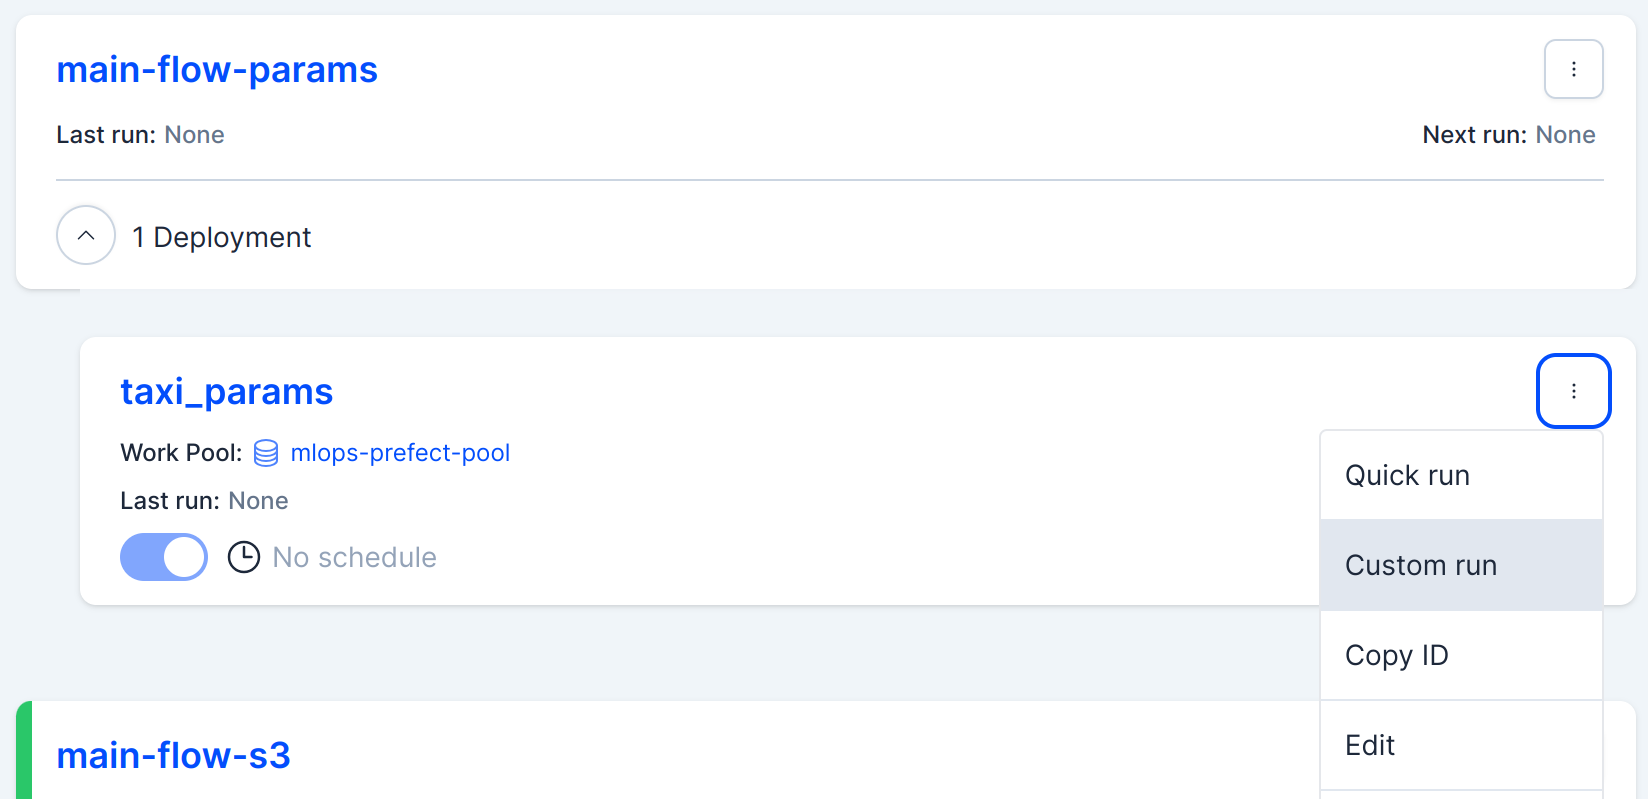

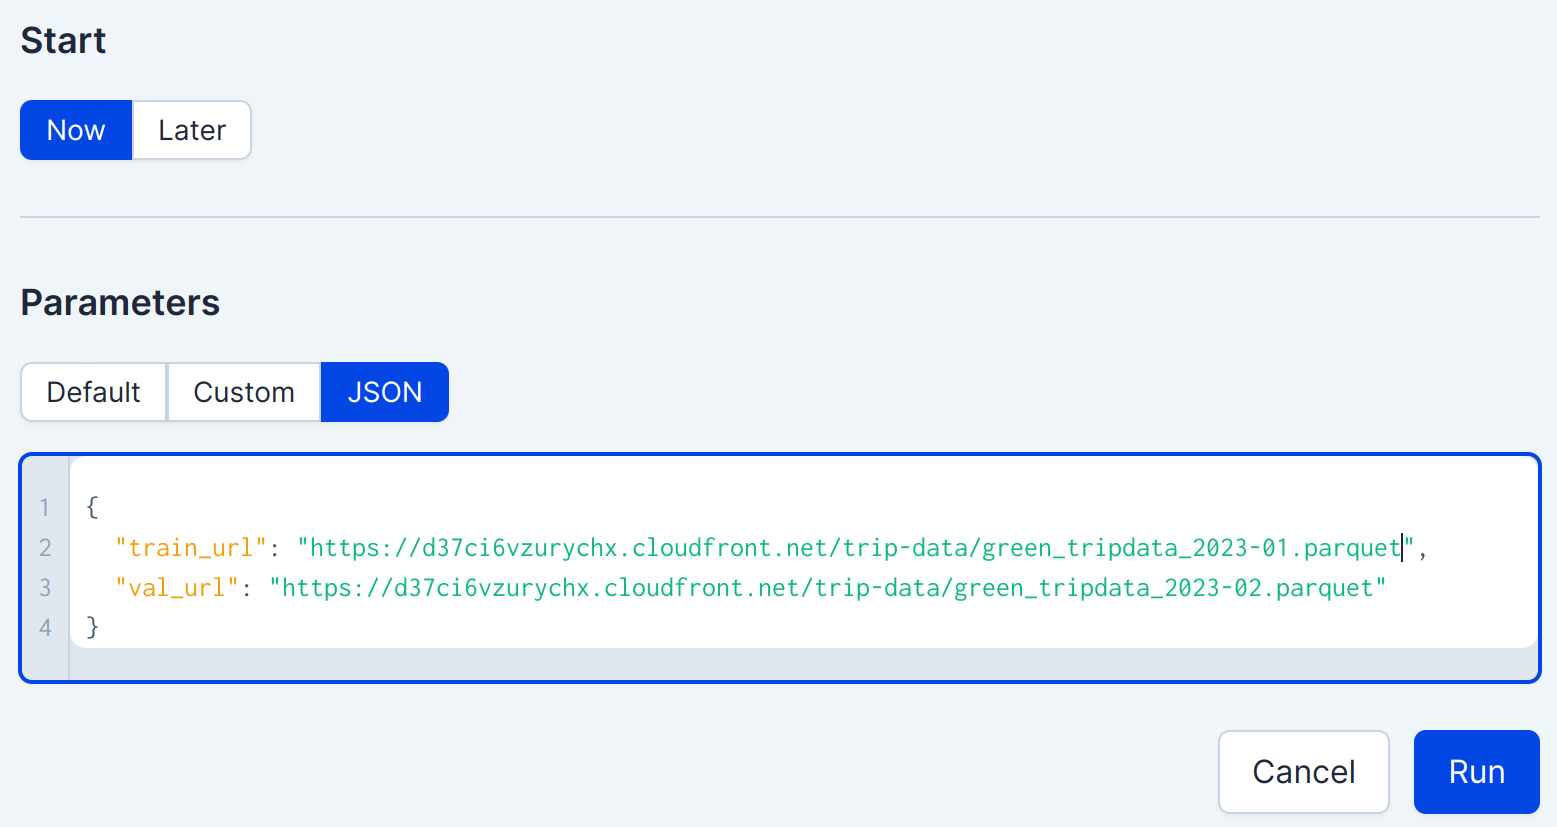

In [ ]:
# rename ./code dir - otherwise git clone fails to update existing dir !!!
!prefect worker start -p mlops-prefect-pool

Discovered worker type 'process' for work pool 'mlops-prefect-pool'.
Worker 'ProcessWorker ad1916b8-e1bd-4534-ac3a-eb2a5c8b1e5f' started!
09:12:15.398 | INFO    | prefect.worker.process.processworker ad1916b8-e1bd-4534-ac3a-eb2a5c8b1e5f - Submitting flow run 'c31763c7-0f17-4cb5-947e-fb04b53d7a13'
09:12:15.513 | INFO    | prefect.worker.process.processworker ad1916b8-e1bd-4534-ac3a-eb2a5c8b1e5f - Opening process...
09:12:15.529 | INFO    | prefect.worker.process.processworker ad1916b8-e1bd-4534-ac3a-eb2a5c8b1e5f - Completed submission of flow run 'c31763c7-0f17-4cb5-947e-fb04b53d7a13'
/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'prefect.engine' found in sys.modules after import of package 'prefect', but prior to execution of 'prefect.engine'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Cloning into 'code'...
09:12:18.244 | INFO    | prefect.projects - Cloned repository 'https://github.com/arybach/code.git' into 'code'
09:12:20.553 | ERROR   | Flow 